# Stock price
- Collect stock price from internet
- compare two stock price 
- In this file, I compare kakao and naver stocks.

In [1]:
import pandas as pd
import urllib3,certifi
import matplotlib.pyplot as plt

from stock_price import stock

In [2]:
st = stock()

In [3]:
st.get_code('카카오')

'035720'

In [4]:
df_naver = st.get_stock_data('NAVER', n_pages=60)

In [5]:
df_kakao = st.get_stock_data('카카오', n_pages=60)

In [6]:
df_kakao.head(3)

,날짜,종가,전일비,시가,고가,저가,거래량
date,,,,,,,
2016-08-12,2016.08.12,89500,1800,91400,91500,89200,762281
2016-08-16,2016.08.16,88600,900,89600,89800,88600,381711
2016-08-17,2016.08.17,88000,600,88600,89300,88000,342989


In [7]:
df_naver.head(3)

,날짜,종가,전일비,시가,고가,저가,거래량
date,,,,,,,
2016-08-12,2016.08.12,782000,4000,777000,784000,777000,51184
2016-08-16,2016.08.16,790000,8000,784000,798000,783000,112935
2016-08-17,2016.08.17,790000,0,775000,792000,775000,69851


In [ ]:
#df_kakao.info()
#df_naver.info()

In [24]:
df2 = pd.DataFrame()
#df2['date'] = df_naver['날짜']
#df2['naver'] =  df_naver['종가']
df2['naver'] =  df_naver['시가']
df2['kakao'] = df_kakao['시가']

In [25]:
df2.head(3)

,naver,kakao
date,,
2016-08-12,777000,91400
2016-08-16,784000,89600
2016-08-17,775000,88600


In [26]:
import datetime

In [27]:
start = datetime.datetime(2018, 10, 8)

end = datetime.datetime(2019, 2, 10)

index = pd.date_range(start, end)

In [28]:
index

DatetimeIndex(['2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15',
               '2018-10-16', '2018-10-17',
               ...
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
               '2019-02-09', '2019-02-10'],
              dtype='datetime64[ns]', length=126, freq='D')

In [40]:
df2.loc[df2.index.isin( index), 'naver'] = df2.loc[df2.index.isin( index), 'naver'] *5
#df2[df2.index.isin( index)].naver = df2[df2.index.isin( index)].naver.map(lambda x: x*4)

In [42]:
#df2[df2.index.isin( index)] 

## Make K5 index level 
- Set first day's value as 1 then nomailze via first day's value
- Index value = (value) / (value of first day)

In [43]:
df2_index = df2.apply(lambda x: x / x[0])

In [44]:
df2_index.head(3)

,naver,kakao
date,,
2016-08-12,1.000000,1.000000
2016-08-16,1.009009,0.980306
2016-08-17,0.997426,0.969365


<Figure size 1080x360 with 0 Axes>

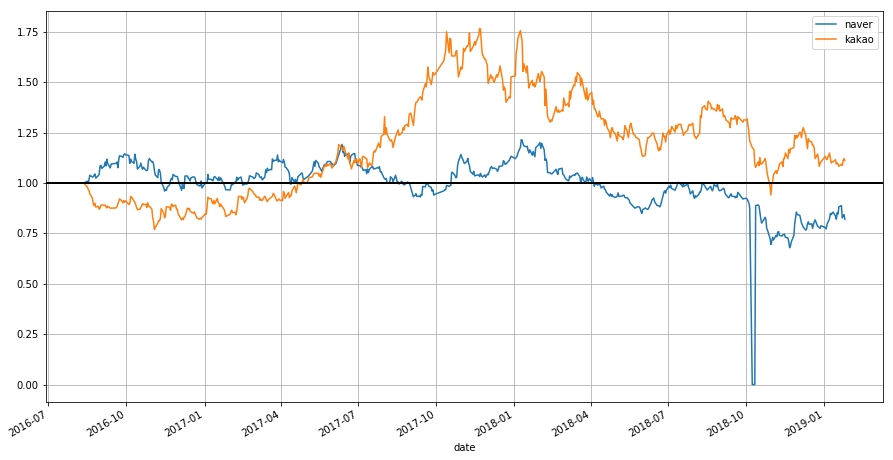

In [45]:
plt.figure(figsize=(15, 5))
df2_index[['naver', 'kakao']].plot(grid = True, figsize = (15, 8)).axhline(y = 1, color = "black", lw = 2)

## Plot scatter


(0.8, 1.4)

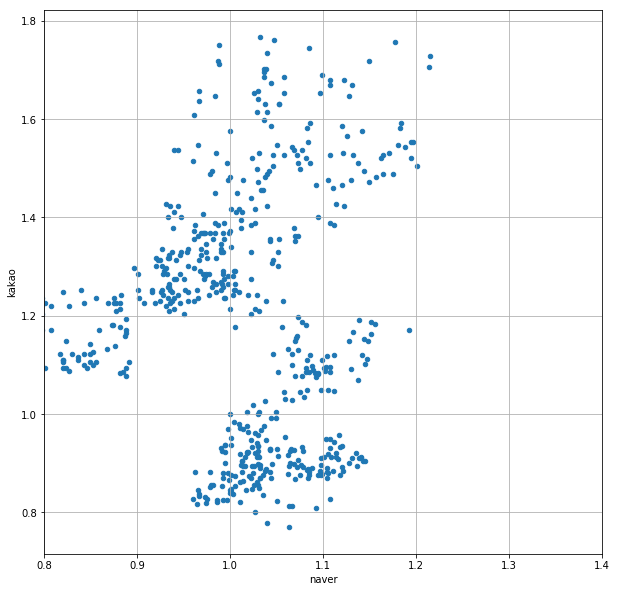

In [46]:
df2_index.plot.scatter(x='naver', y='kakao',  grid= True, figsize = (10, 10))
plt.xlim(0.8, 1.4)

In [47]:
df2.corr()

,naver,kakao
naver,1.00000,0.06139
kakao,0.06139,1.00000
